10.14 Two-Sample Case Study
====

(p.380 @ 9thEd)

In this section, we consider a study involving a thorough graphical and formal analysis, along with annotated computer printout and conclusions. 

In a data analysis study conducted by personnel at the Statistics Consulting Center at Virginia Tech, two different materials, alloy A and alloy B, were compared in terms of breaking strength. 

Alloy B is more expensive, but it should certainly be adopted if it can be shown to be stronger than alloy A. 

The consistency of performance of the two alloys should also be taken into account. 

Random samples of beams made from each alloy were selected, and strength was measured in units of 0.001-inch deflection as a fixed force was applied at both ends of the beam. 

Twenty specimens were used for each of the two alloys. 

The data are given in Table 10.13. It is important that the engineer compare the two alloys. 

Of concern is average strength and reproducibility. 

It is of interest to determine if there is a severe violation of the normality assumption required of both the t- and F-tests. 

Figures 10.21 and 10.22 are 【normal quantile-quantile plots】 of the samples of the two alloys.

There does not appear to be any serious violation of the 【normality assumption】. 

In addition, Figure 10.23 shows two 【box-and-whisker plots】 on the same graph. 

The box-and-whisker plots suggest that there is no appreciable difference in the variability of deflection for the two alloys. 

However, it seems that the mean deflection for alloy B is significantly smaller, suggesting, at least 【graphically, that alloy B is stronger】. 

The sample means and standard deviations are 

$
\bar{y}_A = 83.55, s_A = 3.663; 
$

$
\bar{y}_B = 79.70, s_B = 3.097. 
$

The SAS printout for the PROC 【TTEST】 is shown in Figure 10.24. 

The 【F-test】 suggests no significant difference in variances (P = 0.4709), and the two-sample t-statistic for testing 

$
H_0: μ_A = μ_B
$

$
H_1: μ_A > μ_B 
$

(t = 3.59, P = 0.0009) 
【rejects H0】 
in favor of H1 

and thus confirms what the graphical information suggests. 


Here we use the t-test that pools the two-sample variances together in light of the results of the F-test. 

On the basis of this analysis, the 【adoption of alloy B】 would seem to be in order.


Table 10.13: 
====

Data for Two-Sample Case Study
----


Alloy A  |Alloy B
:----    |:----
88 82 87 |75 81 80
79 85 90 |77 78 81
84 88 83 |86 78 77
89 80 81 |84 82 78
81 85    |80 80 
83 87    |78 76 
82 80    |83 85 
79 78    |76 79 


,X0= A,X1= B
count,20.000000,20.000000
mean,83.550000,79.700000
std,3.663116,3.096688
min,78.000000,75.000000
25%,80.750000,77.750000
50%,83.000000,79.500000
75%,87.000000,81.250000
max,90.000000,86.000000


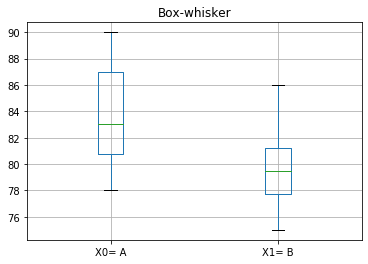

In [48]:
A= [
    88, 82, 87, 
    79, 85, 90, 
    84, 88, 83, 
    89, 80, 81, 
    81, 85,    
    83, 87,    
    82, 80,    
    79, 78
    ]
B= [
    75, 81, 80,
    77, 78, 81,
    86, 78, 77,
    84, 82, 78,
    80, 80, 
    78, 76, 
    83, 85, 
    76, 79    
    ]

import numpy as np
import pandas as pd

X0= pd.Series(A)
X1= pd.Series(B)

dfX= pd.DataFrame(data={'X0= A':X0,'X1= B':X1})

dfX.plot.box(grid=True, title='Box-whisker')
dfX.describe()



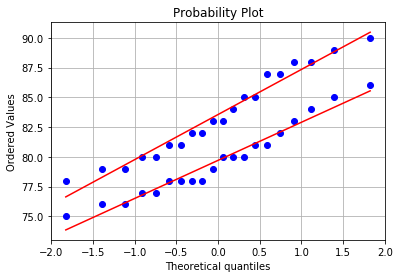

In [49]:
# Quantile-quantile plot (QQ plot)

import scipy.stats as st
import matplotlib.pyplot as pl

st.probplot(X0, dist="norm", plot=pl)
st.probplot(X1, dist="norm", plot=pl)
pl.grid('on')


In [50]:
st.probplot?

In [51]:
# standard error from mean = σ^2/sqrt(n)

X0.sem(), X1.sem()

(0.8190977064011222, 0.692440383145384)

In [52]:
st.t.interval?

In [53]:
# 95% Confidence Inteval

'''
itv= st.t.interval(0.95, X0.size-1)
itv= np.array(itv)
X0.mean()+itv*X0.sem()
'''

itv0= st.t.interval(
    0.95, 
    X0.size-1, 
    loc=  X0.mean(), 
    scale=X0.sem())

itv1= st.t.interval(
    0.95, 
    X1.size-1, 
    loc=  X1.mean(), 
    scale=X1.sem())

itv0, itv1              

((81.83560879759182, 85.26439120240818),
 (78.25070562183303, 81.14929437816697))

In [60]:
# 95% confidence intervals do NOT overlap 
[itv0[0], X0.mean(), itv0[1]], [itv1[0], X1.mean(), itv1[1]]

([81.83560879759182, 83.55, 85.26439120240818],
 [78.25070562183303, 79.7, 81.14929437816697])

In [54]:
# T-test for the difference of the sample means between 2 samples

st.ttest_ind(X0,X1, equal_var= True), st.ttest_ind(X0,X1, equal_var= False)

(Ttest_indResult(statistic=3.589527512948317, pvalue=0.0009342040323076203),
 Ttest_indResult(statistic=3.589527512948317, pvalue=0.0009565897806714848))

In [55]:
# Doing F-test to determine whether σA==σB or not
# st.f?

$
f(x, df_1, df_2)= 
\frac{
  df_2^{df_2/2} 
  df_1^{df_1/2} 
  x^{df_1 / 2-1}
  }{
  (df_2+df_1 x)^{(df_1+df_2)/2}
  B(df_1/2, df_2/2)
  }
$



In [56]:
fValue= X0.var()/X1.var()
dfn= X0.size-1
dfd= X1.size-1

# Prob('F>fValue')=
pValue_1tail= st.f.sf(fValue, dfn= dfn, dfd= dfd)
pValue= pValue_1tail*2

fValue, pValue

(1.399286498353458, 0.4709215162367668)

In [57]:
# since pValue of F-test > α(=.05), we do NOT reject σA==σB
# thus we adopt the ttest_int(equal_var= True)
# pvalue=0.0009342040323076203 < α(=.05)

# Conclusion: 
#    REJECT H0: "μA==μB" (also μA < μB)
# in another word,
#    Accept H1: "μA > μA"

![image.png](fg/fg10.24_p382.png)


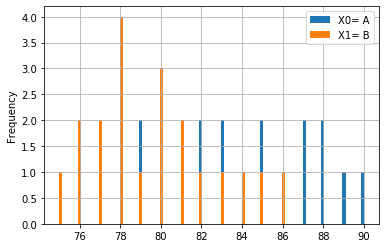

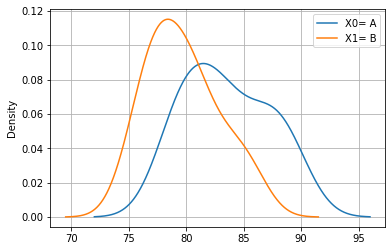

In [66]:
dfX.plot.hist(bins=100, grid=True)
dfX.plot.density(grid=True)

In [77]:
import statsmodels.api as sm

sm.stats.ttest_ind(
    X0,X1,
    alternative="two-sided",
    usevar="unequal")


(3.5895275129483175, 0.0009565897806714847, 36.97594263757838)